In [56]:
from LIFTraining import *

In [57]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
p = create_default_params_LIF()

In [59]:
p['net_size'] = 300
p['total_time'] = 500
p['runtime'] = 500
p['training_loops'] = 200

In [60]:
net = LIFTraining(p)

In [61]:
stim0 = np.zeros((p['net_size'], int(p['runtime']/p['dt'])))
stimr = net.gen_rand_stim(p) * 5

In [62]:
def gen_sine_targets(N, T, dt): 
    
    timesteps = int(T/dt)
    targets = np.zeros((N, timesteps))
    for i in range(N):
        amp = sp.stats.uniform.rvs() + 0.5
        t0 = sp.stats.uniform.rvs() * 1000
        t1 = sp.stats.uniform.rvs() * 700 + 300
        x = np.linspace(0, T, num = timesteps)
        targets[i] = np.sin(2 * np.pi * (x - t0)/t1)
    return targets

In [63]:
targ = gen_sine_targets(net.N, net.T, net.dt)

In [64]:
net.train_LIF(stimr, targ)

training: 0
training: 20
training: 40
training: 60
training: 80
training: 100
training: 120
training: 140
training: 160
training: 180


In [65]:
voltage, slow, fast = net.run_LIF(stimr)

In [68]:
Jslow = np.dot(net.Js, slow)
np.shape(Jslow)

(200, 5000)

Text(0.5, 1.0, 'Behavior after training')

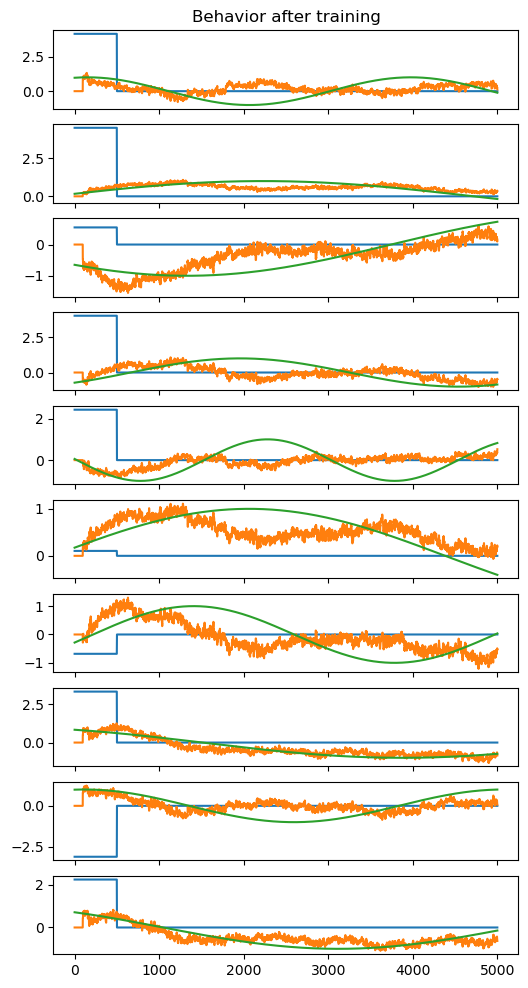

In [69]:
n_plot = 10
T = net.T
dt = net.dt

fig, axs = plt.subplots(n_plot, 1, figsize = (6, 12), sharex = True)
for i in range(n_plot):
    axs[i].plot(stimr[i])
    axs[i].plot(Jslow[i])
    #axs[i].plot(fast[i])
    axs[i].plot(targ[i])
    #axs[i].plot(voltage[i])
axs[0].set_title("Behavior after training")